In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Add_sales_data_2018.csv")
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [2]:
data.shape

(205, 7)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

No Null values in the data


In [5]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


#  check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.



<AxesSubplot:>

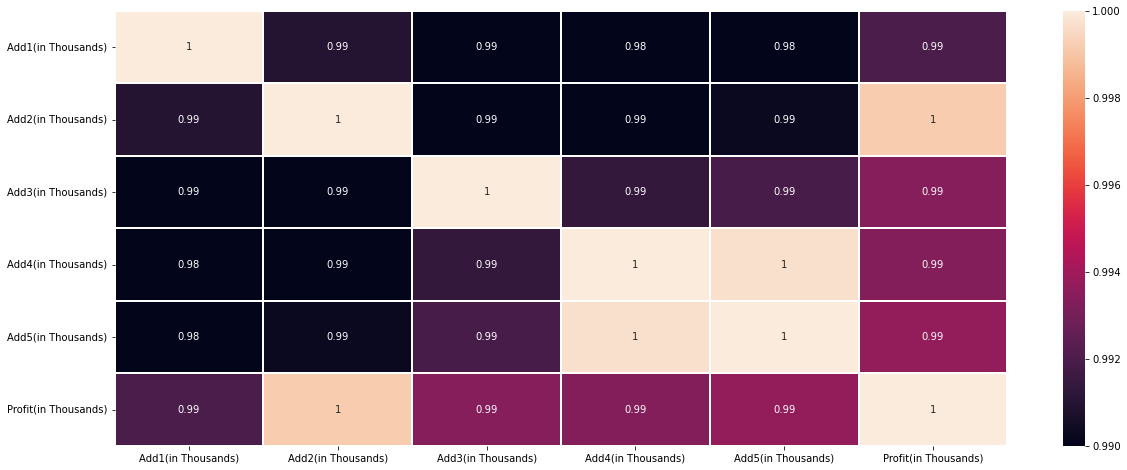

In [21]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=.99,vmax=1,annot = True,linewidth=.2)

There is a strong correlation between the amount spent for advertising through five different companies and profit.The more the money spent on advertisement, the more is the profit.

# Build a regression model to predict the profit from the given data and comment your findings on it.

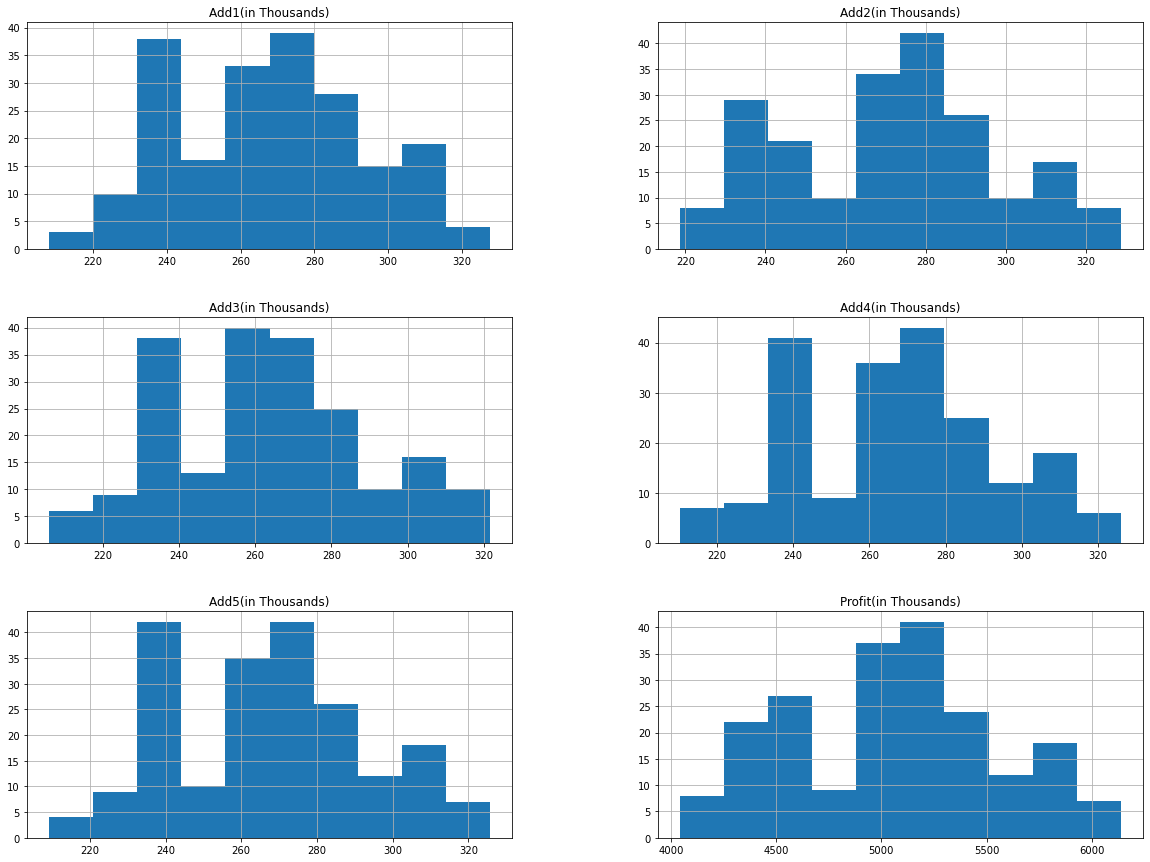

In [8]:
freqgraph = data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [28]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [29]:
data1 = data.drop(['Add4(in Thousands)'],axis=1)
data1.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [30]:
Y=data1['Profit(in Thousands)']
X=data1[['Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)']]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(Y_test,predictions))

MSE is: 0.0


In [33]:
from sklearn.metrics import r2_score as r2
print(r2(Y_test,predictions))

1.0


# Predict the profit generated by the company

In [35]:
x=np.array(data['Add1(in Thousands)']).reshape(-1,1)
y=data['Profit(in Thousands)']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
lr.predict([[290]])

array([5475.26814054])

In [36]:
#Add2(in Thousands)=312
x=np.array(data['Add2(in Thousands)']).reshape(-1,1)
y=data['Profit(in Thousands)']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
lr.predict([[312]])

array([5817.81208015])

In [37]:
#Add3(in Thousands)=3309
x=np.array(data['Add3(in Thousands)']).reshape(-1,1)
y=data['Profit(in Thousands)']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
lr.predict([[309]])

array([5907.07094573])

In [38]:
#Add4(in Thousands)=298
x=np.array(data['Add4(in Thousands)']).reshape(-1,1)
y=data['Profit(in Thousands)']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
lr.predict([[298]])

array([5623.48817686])

In [39]:
#Add5(in Thousands)=320
x=np.array(data['Add5(in Thousands)']).reshape(-1,1)
y=data['Profit(in Thousands)']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
lr.predict([[320]])

array([6029.9345249])

In [ ]:
These are the estimated profits that the company will generate. 